AUC alpha
0.841113841114 999.9999999999999
0.864045864046 99.99999999999999
0.907452907453 10.0
0.9180999181 1.0
0.882882882883 0.1
0.861588861589 0.010000000000000002
0.851760851761 0.0010000000000000002
0.850941850942 0.00010000000000000002
0.849303849304 1.0000000000000003e-05


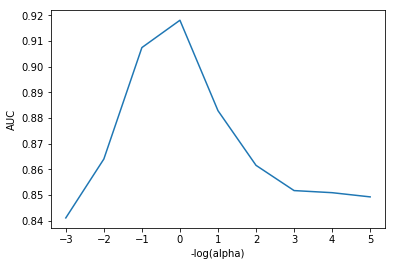

In [7]:
from urllib.request import urlopen
import numpy as np

import pylab as pl
from sklearn.linear_model import Ridge
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
             )
data = urlopen(target_url)

# divide the data into features and labels
xList = []
labels = []
for line in data:
    line = line.decode('utf-8')
    row=line.strip().split(",")
    #print(line)
    #xList.append(row)
    if row[-1] == 'M':
        labels.append(1.0)
    else:
        labels.append(0.0)
    row.pop()
    floatrow = [float(num) for num in row]
    xList.append(floatrow)
#print(xList)

# divide the dataset into trainning and testing
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0]
xListTrain = [xList[i] for i in indices if i%3 != 0]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

xTrain = np.array(xListTrain)
xTest = np.array(xListTest)
yTrain = np.array(labelsTrain)
yTest = np.array(labelsTest)

aucList = []
alphaList = [0.1**i for i in [-3,-2,-1,0,1,2,3,4,5]]
for alph in alphaList:
    rockVSMinesRidgeModel = Ridge(alpha = alph)
    rockVSMinesRidgeModel.fit(xTrain,yTrain)
    ypredictions = rockVSMinesRidgeModel.predict(xTest)
    fpr,tpr,thresholds = roc_curve(yTest,ypredictions)
    roc_auc = auc(fpr,tpr)
    aucList.append(roc_auc)

print("AUC alpha")
x = [-3,-2,-1,0,1,2,3,4,5]
for i in range(len(alphaList)):
    print(aucList[i],alphaList[i])
plt.plot(x,aucList)
plt.xlabel('-log(alpha)')
plt.ylabel('AUC')
plt.show()

3


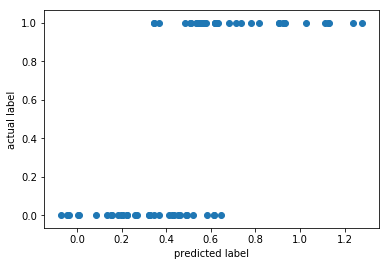

In [10]:
# find the best alpha
indexBest = aucList.index(max(aucList))
print(indexBest)
rockVSMinesRidgeModel = Ridge(alpha = alphaList[indexBest])
rockVSMinesRidgeModel.fit(xTrain,yTrain)
prediction=rockVSMinesRidgeModel.predict(xTest)
plt.scatter(prediction,yTest)
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()